In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('Crime Data Set_Baltimore.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,18-06-2016,00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1
1,18-06-2016,00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1
2,18-06-2016,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1
3,18-06-2016,01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1
4,18-06-2016,02:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        264496 non-null  object 
 1   CrimeTime        264496 non-null  object 
 2   CrimeCode        264496 non-null  object 
 3   Location         262692 non-null  object 
 4   Description      260445 non-null  object 
 5   Weapon           89833 non-null   object 
 6   Post             264286 non-null  float64
 7   District         264435 non-null  object 
 8   Neighborhood     262623 non-null  object 
 9   Location 1       262694 non-null  object 
 10  Total Incidents  264496 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 22.2+ MB


In [13]:
df['Total Incidents'].value_counts()

1    264496
Name: Total Incidents, dtype: int64

In [14]:
null_count = df.isnull().sum()
null_prop = null_count / len(df)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,1804,0.006821
Description,4051,0.015316
Weapon,174663,0.660362
Post,210,0.000794
District,61,0.000231
Neighborhood,1873,0.007081
Location 1,1802,0.006813


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_weapon = df[df['Weapon'].isnull()]

C:\Users\Raj Bhuva\AppData\Local\Temp\ipykernel_1556\2056353215.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


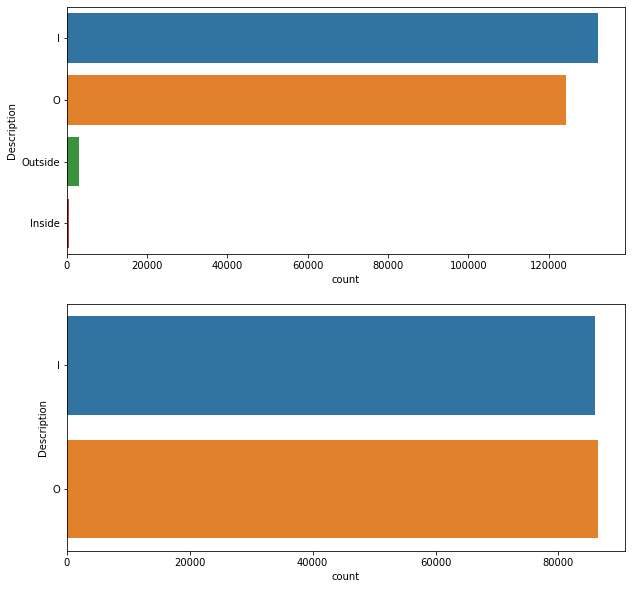

In [17]:
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0])
sns.countplot(y= df_weapon['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

In [20]:
df['Weapon'].fillna("No Weapon", inplace=True)

In [22]:
df['CrimeTime'] = df['CrimeTime'].str.replace('24:00:00', '00:00:00')

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,18-06-2016,00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1
1,18-06-2016,00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1
2,18-06-2016,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1
3,18-06-2016,01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1
4,18-06-2016,02:05:00,6C,800 N WOLFE ST,I,No Weapon,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1


In [26]:
df['Date'] = df['CrimeDate'] + ' ' + df['CrimeTime']
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Date
0,18-06-2016,00:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,18-06-2016 00:33:00
1,18-06-2016,00:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,18-06-2016 00:39:00
2,18-06-2016,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,18-06-2016 15
3,18-06-2016,01:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,18-06-2016 01:53:00
4,18-06-2016,02:05:00,6C,800 N WOLFE ST,I,No Weapon,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,18-06-2016 02:05:00


In [25]:
df['Date'] = pd.to_datetime(df['Date'])

ParserError: Unknown string format: 16-06-2016 127